In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

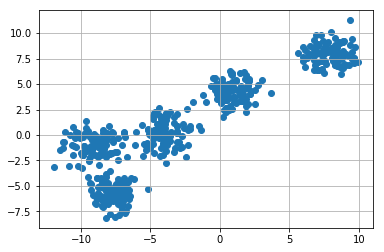

In [3]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [29]:
k = 5

color  = ["green","red","blue","yellow","orange"]

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    print(center)
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color': color[i]
        }
    clusters[i] = cluster

print(clusters)



[2.94545781 3.11942754]
[2.05706316 2.17525327]
[ 7.75424874 -8.18576695]
[-9.75493684  8.6615939 ]
[-7.96061851  1.16101313]
{0: {'center': array([2.94545781, 3.11942754]), 'points': [], 'color': 'green'}, 1: {'center': array([2.05706316, 2.17525327]), 'points': [], 'color': 'red'}, 2: {'center': array([ 7.75424874, -8.18576695]), 'points': [], 'color': 'blue'}, 3: {'center': array([-9.75493684,  8.6615939 ]), 'points': [], 'color': 'yellow'}, 4: {'center': array([-7.96061851,  1.16101313]), 'points': [], 'color': 'orange'}}


In [5]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [14]:

# Assign every data point to one of the clusters
def assignPointToClusters(clusters): #E-Step
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list 
                    
    

def plotClusters(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        #print(pts.shape)
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")

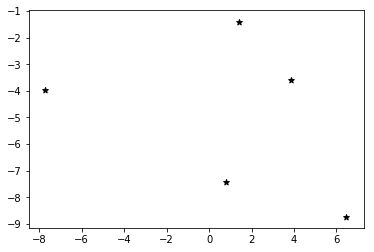

In [15]:
plotClusters(clusters)

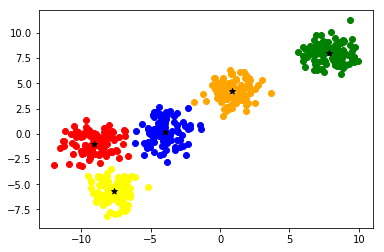

In [24]:

# Repeat this cell few times or put it inside a loop
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

In [107]:
from sklearn.cluster import KMeans


In [108]:
kmeans=KMeans(n_clusters=5)

In [109]:
kmeans.fit(X,Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [110]:
centers=kmeans.cluster_centers_

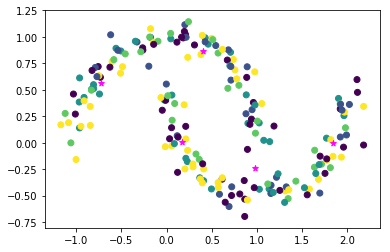

In [114]:
plt.scatter(X[:200,0],X[:200,1],c=pred)
plt.scatter(centers[:,0],centers[:,1],marker="*",color="magenta")

In [115]:
plt.show()

In [116]:
pred=kmeans.labels_

In [117]:
print(pred)

[3 4 2 1 0 2 2 1 3 4 4 1 1 1 1 2 0 1 1 0 2 3 3 0 4 3 0 1 3 0 2 1 4 0 1 2 2
 0 3 0 2 3 1 0 2 4 4 0 2 0 2 4 2 1 1 3 4 0 1 2 0 1 4 0 2 1 1 0 2 3 0 1 4 1
 3 4 1 0 3 0 2 1 2 1 4 4 0 1 0 0 4 1 4 1 0 3 2 1 2 1 0 2 2 3 3 2 2 3 3 2 1
 0 4 2 2 1 2 2 4 2 2 2 3 1 4 4 0 4 1 1 3 1 2 1 3 1 0 0 3 2 3 0 2 3 0 0 0 1
 4 1 4 1 1 1 3 3 3 0 3 3 0 4 4 4 2 3 0 4 1 0 0 0 1 3 0 4 2 4 4 3 0 2 1 2 4
 1 3 0 3 3 4 2 4 3 0 2 1 2 0 0]


In [118]:
from sklearn.datasets import make_circles,make_moons

In [119]:
X,Y=make_moons(n_samples=200,noise=0.10)

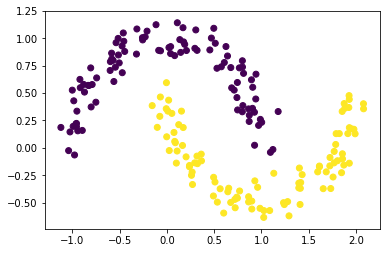

In [120]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [126]:
km=KMeans(n_clusters=4)

In [127]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [128]:
centers=km.cluster_centers_

In [129]:
label=km.labels_

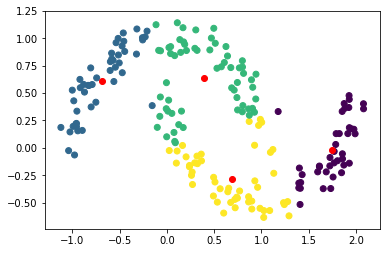

In [130]:
plt.scatter(X[:,0],X[:,1],c=label)
plt.scatter(centers[:,0],centers[:,1],color='red')
plt.show()

In [84]:
plt.show()

In [85]:
#DBSCAN

In [100]:
from sklearn.cluster import DBSCAN


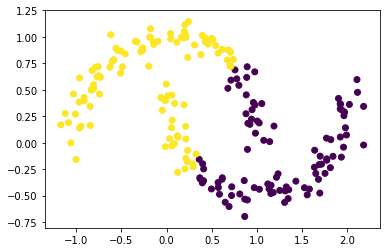

In [101]:
dbs=DBSCAN(eps=0.2,min_samples=5)
plt.scatter(X[:,0],X[:,1],c=label)

In [102]:
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [103]:
Y_pred=dbs.fit_predict(X)

In [104]:
print(Y_pred)

[ 0  0  1  0  1  1  1  0  0  0  0  1  0  0  0  1  1  1  0  1  1  0  0  1
  0  0  1  0 -1  1  1  0  0  1  0  1  1  1  0  1  1  0  0  1  1  0  0  1
  1  1  1  0  1  1  1 -1  0  1  0  1  1  0  0  1  1  1  0  1  1  0  1  0
  0  0  0  0  0  1  0  1  1  0  1  1  0  0  1  0  1  1  0  0  0  0  1  0
  1  0  1  0  1  1  1  0  0  1  1  0  0  1  0  1  0  1  1  1  1  1  0  1
  1  1  0  0  0  0  1  0  1  1  0  1  1  1  0  0  1  1  0  1  0  1  1  0
  1  1  1  1  0  0  0  0  0  1  0  0  0  1  0  0  1  0  0  0  1  0  1  0
  1  1  1  1  0  0  1  0  1  0  0  0  1  1  0  1  0  1  0  1  0  0  0  1
  0  0  1  1  0  1  1  0]


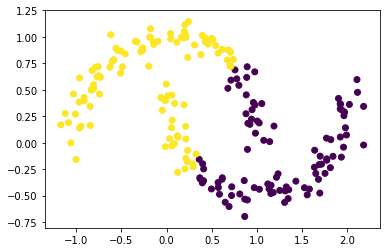

In [105]:
plt.scatter(X[:,0],X[:,1],c=label)